**Business Problem:**
<br>DQLab Telco is a telecommunications company that already has many branches spread everywhere. Since its establishment in 2019, DQLab Telco has consistently paid attention to its customer experience so that customers will not be left behind.
<br>
<br> **Solution Problem:**
<br>Although only a little over 1 year old, DQLab Telco already has many customers who have switched subscriptions to competitors. The management wants to reduce the number of customers who switch (churn) by using machine learning.
<br>
<br>As a data scientist, I am asked to create the right model. In this assignment, I will do Machine Learning Modeling using June 2020 data.
<br>
<br>The steps that will be taken are:
1.    Perform Exploratory Data Analysis (EDA)
2.    Perform Data Pre-Processing
3.    Performing Machine Learning Modeling
4.    Determining the Best Model
5.    Predict the Customer Churn

# **IMPORT LIBRARY AND UNLOADING FILE**

**Import Library**

In [1]:
#Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

**Load the Dataset!**

*   Extract dqlab_telco_final Dataset using pandas and renamed the file with the name `df_load`
*   Observe the data by looking at the number of columns and rows (data shape)
*   Observe the top 5 rows of the data --> `print(df_load.head())`
*   Find for the number of unique Customer IDs and view the total number of rows and their data types --> `df_load.info()`

In [2]:
# Load the Dataset
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')

# Shape of the Dataset
print(f'The Dataset contains {df_load.shape[0]} Rows and {df_load.shape[1]} Columns')
print(' ')

# The Number of Customers
print(f'Number of Unique Customers: {df_load.customerID.nunique()}')
print(' ')

# Show the 5 Rows of the Data
df_load.head()

The Dataset contains 6950 Rows and 13 Columns
 
Number of Unique Customers: 6950
 


,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


In [3]:
# Inspect df_load
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6950 non-null   int64  
 1   customerID        6950 non-null   int64  
 2   gender            6950 non-null   object 
 3   SeniorCitizen     6950 non-null   object 
 4   Partner           6950 non-null   object 
 5   tenure            6950 non-null   int64  
 6   PhoneService      6950 non-null   object 
 7   StreamingTV       6950 non-null   object 
 8   InternetService   6950 non-null   object 
 9   PaperlessBilling  6950 non-null   object 
 10  MonthlyCharges    6950 non-null   float64
 11  TotalCharges      6950 non-null   float64
 12  Churn             6950 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 706.0+ KB


## **Exploratory Data Analysis (EDA)**

Exploratory data analysis (EDA) is used  to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

**Visualized Churn Percentage**

We want to see univariate data visualizations related to the percentage of churn data from customers. Use the `value_counts()` function to calculate the number of unique counts of a column, `pie()` to create a pie chart

Here are the results that should be produced:

In [4]:
# Explore the Customer!
churn_group = df_load.groupby('Churn').agg(target_cnt=('customerID','count')).sort_values(by='Churn', ascending=True).reset_index()
churn_group.style.background_gradient()

,Churn,target_cnt
0,No,5114
1,Yes,1836


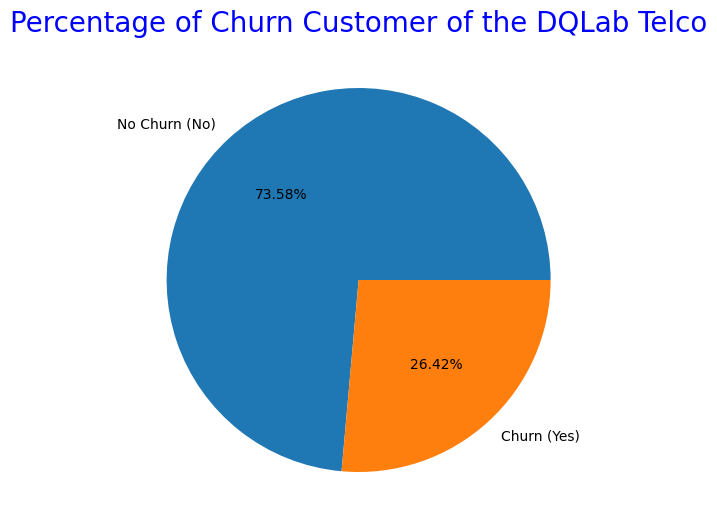

In [5]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No Churn (No)','Churn (Yes)']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct= '%.2f%%')
plt.title(label = 'Percentage of Churn Customer of the DQLab Telco',
          size = 20,
          color = 'blue')
plt.show()

[Text(0, 0, '1836 (26.42%)'), Text(0, 0, '5114 (73.58%)')]

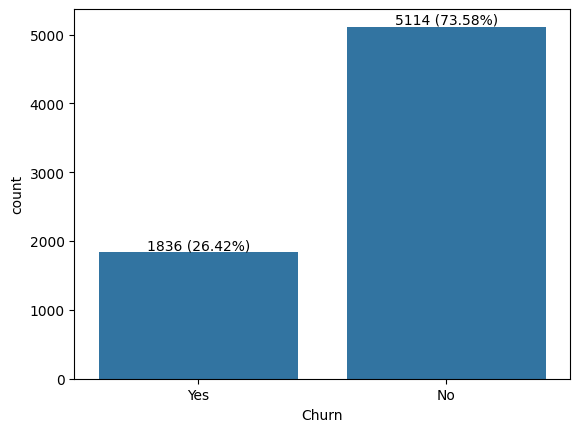

In [6]:
ax = sns.countplot(x=df_load['Churn'],
                   order=df_load['Churn'].value_counts(ascending=True).index);

abs_values = df_load['Churn'].value_counts(ascending=True)
rel_values = df_load['Churn'].value_counts(ascending=True, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.2f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

**CONCLUSION**

Based on the result and analysis above it can be concluded that we can see that the overall data distribution of customers did not churn (**No Churn**), with details of 26.42% `Churn` and 73.58% No `Churn` .

**Exploratory Data Analysis (EDA) of Numeric Variable**

What we will do next is to choose a predictor variable that is numerical in nature and make a bivariate plot, then interpret it

Use the `df_load` data to work on at this stage and use the `subplots()` function to generate the figures and a set of subplots.

Proper coding will produce the following output:
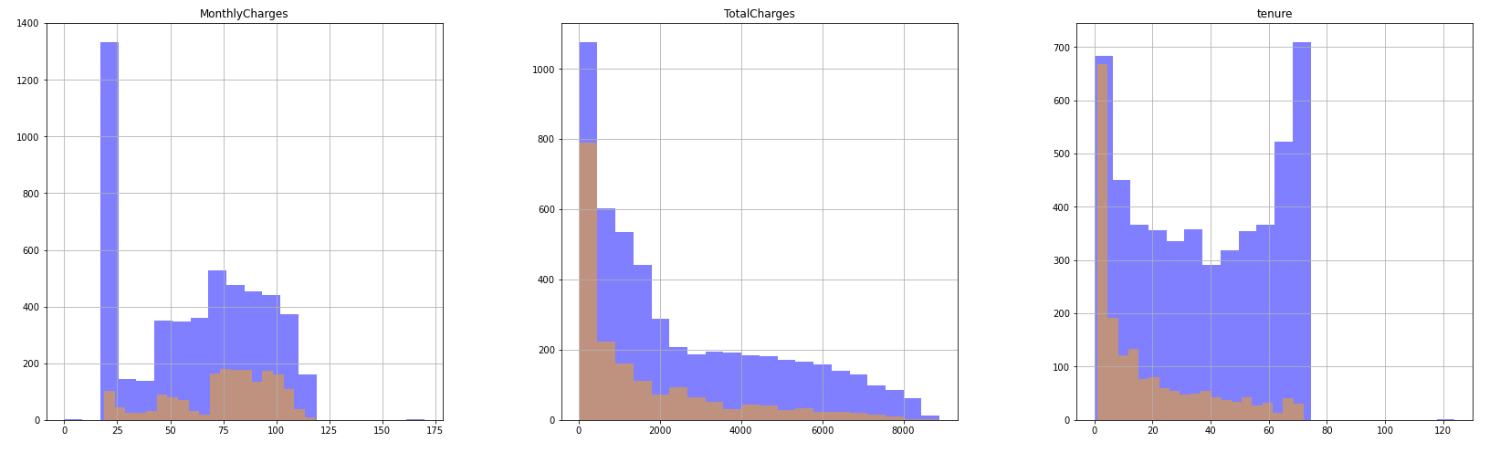

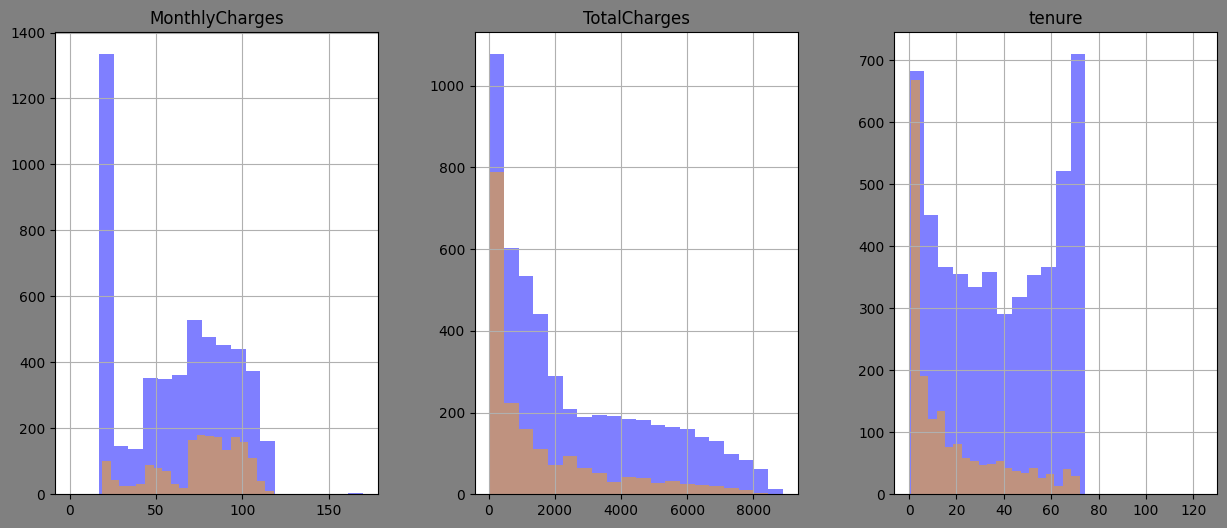

In [7]:
# Creating bin in chart
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
fig.set_facecolor('grey')

# Plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

**CONCLUSION**

Based on the result and analysis above it can be concluded that:
- `MonthlyCharges` : there is a tendency that the smaller the value of the monthly fee charged, the smaller the tendency to make Churn.
- `TotalCharges` : there is doesn't seem to be any tendency towards Churn customers.
- `tenure` : there is a tendency that the longer the customer subscribes, the less the tendency to Churn.

**Exploratory Data Analysis (EDA) of Categoric Variable**

After that, we will select a categorical predictor variable and make a bivariate plot, then interpret it

Use `df_load` data for processing at this stage. Use the `countplot()` function to create a plot with the number of observations in each bin of a categorical variable

The expected results are as follows.
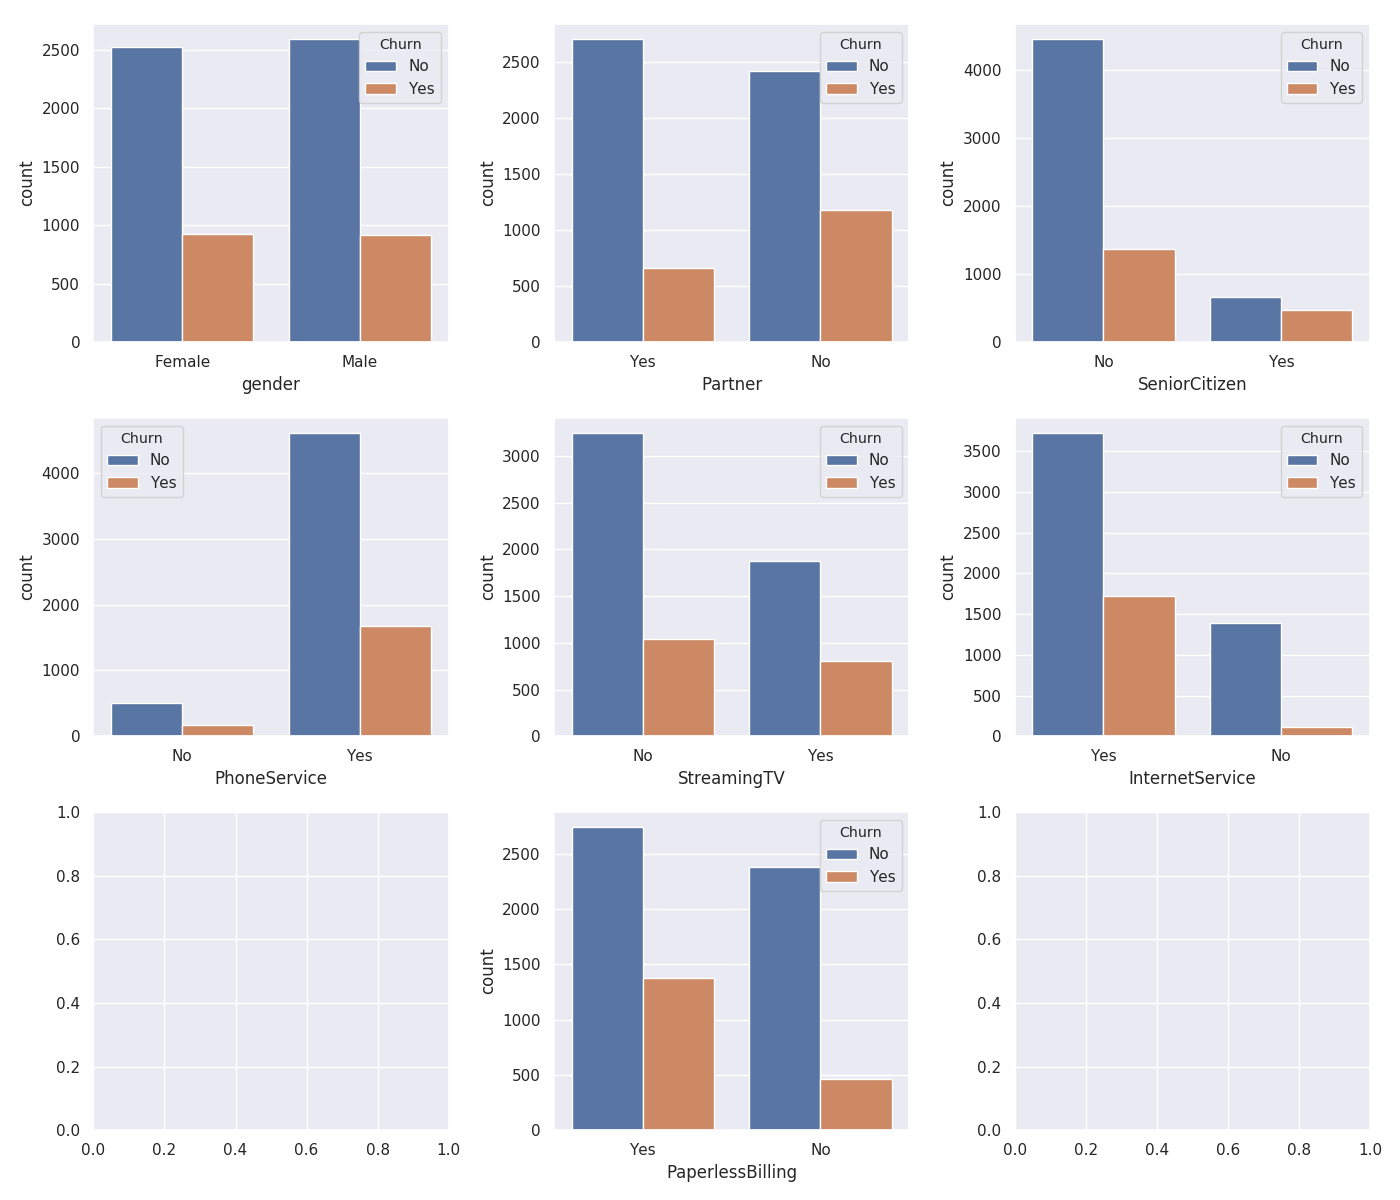

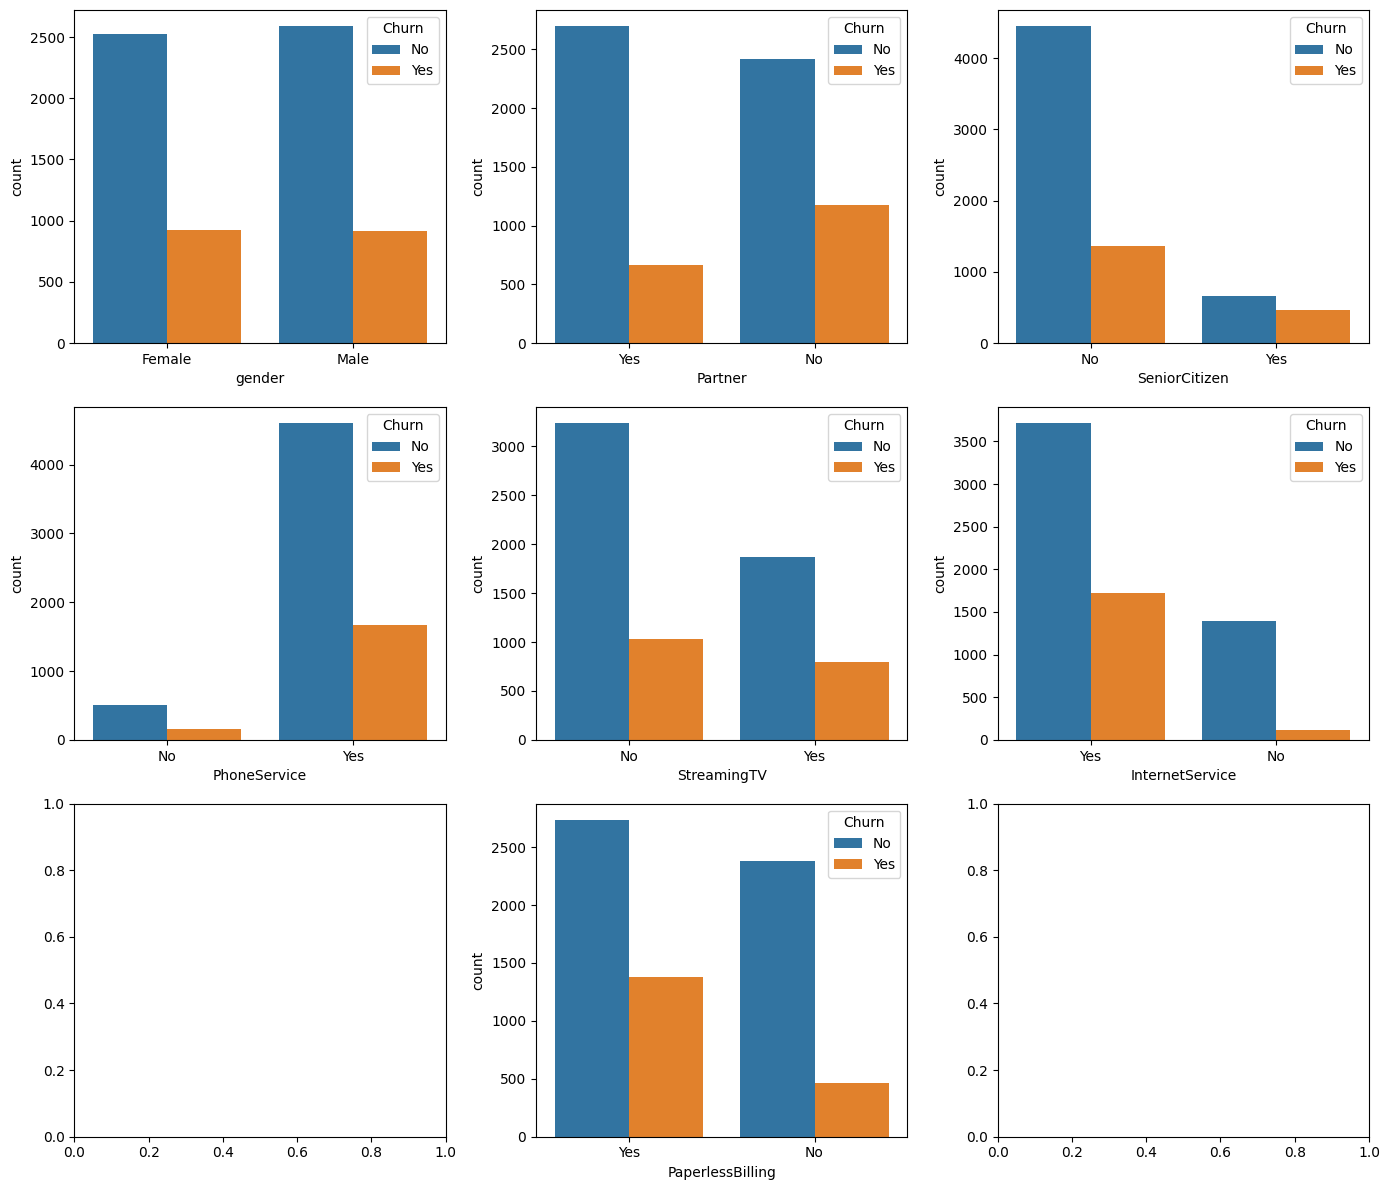

In [8]:
# Explore Churn and No Churn Customer by Gender, Partner Ownership, Senior Citizen, Phone Service, Streaming TV, Internet Service and Paperless Billing
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

**CONCLUSION**

Based on the result and analysis above it can be concluded that :
- There is no significant difference for people who do churn in terms of gender and their telephone service `(PhoneService)`.
- However, there is a tendency that people who do Churn are people who :
  - Don't have partners `(partner: No)`
  - People whose status is senior citizens `(SeniorCitizen: Yes)`
  - People who have TV streaming services` (StreamingTV: Yes)`
  - People who have Internet service` (internetService: Yes)`
  - People whose bills are paperless `(PaperlessBilling: Yes)`.

# **PreProcessing Data & Data Splitting**

**Remove Unecessary Columns from the Data**

* Next we will delete the columns that will not be included in the modeling, then save them with the name `cleaned_df_train`
* Show the top 5 rows.
* Use `drop()` to remove a column from a data set

In [9]:
# Create df_load into data that will be trained
df_train=df_load.copy()

In [10]:
# Inspect Data Train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6950 non-null   int64  
 1   customerID        6950 non-null   int64  
 2   gender            6950 non-null   object 
 3   SeniorCitizen     6950 non-null   object 
 4   Partner           6950 non-null   object 
 5   tenure            6950 non-null   int64  
 6   PhoneService      6950 non-null   object 
 7   StreamingTV       6950 non-null   object 
 8   InternetService   6950 non-null   object 
 9   PaperlessBilling  6950 non-null   object 
 10  MonthlyCharges    6950 non-null   float64
 11  TotalCharges      6950 non-null   float64
 12  Churn             6950 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 706.0+ KB


In [11]:
# Remove the unnecessary columns (UpdatedAt) and set customerID into index of the dataframe
cleaned_df_train = df_train.drop(['UpdatedAt'],axis=1)
cleaned_df_train.set_index('customerID', inplace=True)
cleaned_df_train.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,
45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


In [12]:
# Inspect cleaned_df_train!
cleaned_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6950 entries, 45759018157 to 45957014561
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6950 non-null   object 
 1   SeniorCitizen     6950 non-null   object 
 2   Partner           6950 non-null   object 
 3   tenure            6950 non-null   int64  
 4   PhoneService      6950 non-null   object 
 5   StreamingTV       6950 non-null   object 
 6   InternetService   6950 non-null   object 
 7   PaperlessBilling  6950 non-null   object 
 8   MonthlyCharges    6950 non-null   float64
 9   TotalCharges      6950 non-null   float64
 10  Churn             6950 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 651.6+ KB


**Encoding Data**

Use the data from the previous results and analysis `cleaned_df_train`, to change the value of the data which is still in the form of strings to be converted into numeric form using `LabelEncoder()`. Use `describe()` to see a description of the data.

In [13]:
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df_train.columns:
    if cleaned_df_train[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
    cleaned_df_train[column] = LabelEncoder().fit_transform(cleaned_df_train[column])

cleaned_df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,6950.0,0.504317,0.500017,0.0,0.0000,1.00,1.0000,1.00000
SeniorCitizen,6950.0,0.162302,0.368754,0.0,0.0000,0.00,0.0000,1.00000
Partner,6950.0,0.483309,0.499757,0.0,0.0000,0.00,1.0000,1.00000
tenure,6950.0,32.415827,24.561336,0.0,9.0000,29.00,55.0000,73.00000
PhoneService,6950.0,0.903741,0.294967,0.0,1.0000,1.00,1.0000,1.00000
StreamingTV,6950.0,0.384317,0.486468,0.0,0.0000,0.00,1.0000,1.00000
InternetService,6950.0,0.783453,0.411921,0.0,1.0000,1.00,1.0000,1.00000
PaperlessBilling,6950.0,0.591942,0.491509,0.0,0.0000,1.00,1.0000,1.00000
MonthlyCharges,6950.0,64.992201,30.032040,0.0,36.4625,70.45,89.8500,169.93125
TotalCharges,6950.0,2286.058750,2265.702553,19.0,406.9750,1400.85,3799.8375,8889.13125


**Splitting Dataset**

* Use data from previous results and analysis `df_train`, to divide the dataset into 2 parts (70% training & 30% testing) based on the predictor variable (X) and the target (Y).
* Use `train_test_split()` to split the data.
* Include value_counts to check whether the proportions are the same. Save the results of splitting data into `x_train`, `y_train`, `x_test` & `y_test`

In [14]:
# Predictor dan target
X = cleaned_df_train.drop('Churn', axis = 1)
y = cleaned_df_train['Churn']

In [15]:
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print according to the expected result
print('Number of Rows and Column in the x_train:', x_train.shape,', however number of Rows and Column in the y_train:', y_train.shape)
print(' ')
print('Churn Percentage in the Train Data:')
print(y_train.value_counts(normalize=True))

print(' ')
print(' ')

print('Number of Rows and Columns in the x_test:', x_test.shape,', however number of Rows and Columns in the y_test is:', y_test.shape)
print('')
print('Churn Percentage in the Testing Data:')
print(y_test.value_counts(normalize=True))

Number of Rows and Column in the x_train: (4865, 10) , however number of Rows and Column in the y_train: (4865,)
 
Churn Percentage in the Train Data:
Churn
0    0.734841
1    0.265159
Name: proportion, dtype: float64
 
 
Number of Rows and Columns in the x_test: (2085, 10) , however number of Rows and Columns in the y_test is: (2085,)

Churn Percentage in the Testing Data:
Churn
0    0.738129
1    0.261871
Name: proportion, dtype: float64


In [16]:
# Standardize the Data

# Function to fit the scaler
def fit_scaler(data: pd.DataFrame):
    """
    Fit a StandardScaler on the input data.

    Parameters:
        data (pd.DataFrame): The input DataFrame with numerical columns.

    Returns:
        StandardScaler: The fitted scaler object.
    """
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler

# Function to transform data using the fitted scaler
def transform_scaler(data: pd.DataFrame, scaler: StandardScaler):
    """
    Transform the data using a fitted StandardScaler.

    Parameters:
        data (pd.DataFrame): The input DataFrame with numerical columns.
        scaler (StandardScaler): The fitted scaler object.

    Returns:
        pd.DataFrame: The scaled DataFrame.
    """
    scaled_data = scaler.transform(data)
    return pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

In [17]:
# Fit the scaler! (x_train)
scaler = fit_scaler(x_train)

# Transform the scaler
x_train = transform_scaler(x_train, scaler)

In [18]:
# Describe the x_train!
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4865.0,1.022364e-16,1.000103,-1.003088,-1.003088,0.996921,0.996921,0.996921
SeniorCitizen,4865.0,-8.032857e-18,1.000103,-0.437637,-0.437637,-0.437637,-0.437637,2.285001
Partner,4865.0,5.842078e-17,1.000103,-0.967038,-0.967038,-0.967038,1.034085,1.034085
tenure,4865.0,2.921039e-18,1.000103,-1.305927,-0.941217,-0.171273,0.922858,1.611755
PhoneService,4865.0,-4.965766e-17,1.000103,-3.040083,0.328938,0.328938,0.328938,0.328938
StreamingTV,4865.0,-3.943403e-17,1.000103,-0.796019,-0.796019,-0.796019,1.256251,1.256251
InternetService,4865.0,1.767229e-16,1.000103,-1.900362,0.526216,0.526216,0.526216,0.526216
PaperlessBilling,4865.0,-8.763117e-18,1.000103,-1.189786,-1.189786,0.840487,0.840487,0.840487
MonthlyCharges,4865.0,-3.067091e-16,1.000103,-2.166230,-0.956597,0.184628,0.830322,3.504235
TotalCharges,4865.0,2.482883e-17,1.000103,-0.993103,-0.824618,-0.390630,0.651685,2.910491


In [19]:
# Fit the scaler! (x_test)
scaler = fit_scaler(x_test)

# Transform the scaler
x_test = transform_scaler(x_test, scaler)

In [20]:
# Describe x_test!
x_test.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,2085.0,-1.039403e-16,1.00024,-1.021821,-1.021821,0.978645,0.978645,0.978645
SeniorCitizen,2085.0,-7.156546e-17,1.00024,-0.446055,-0.446055,-0.446055,-0.446055,2.241877
Partner,2085.0,1.874333e-17,1.00024,-0.967436,-0.967436,-0.967436,1.033660,1.033660
tenure,2085.0,1.329073e-16,1.00024,-1.353426,-0.982709,-0.076514,0.912063,1.653496
PhoneService,2085.0,1.286474e-16,1.00024,-3.122086,0.320299,0.320299,0.320299,0.320299
StreamingTV,2085.0,-2.087326e-17,1.00024,-0.776282,-0.776282,-0.776282,1.288192,1.288192
InternetService,2085.0,-1.124600e-16,1.00024,-1.906130,0.524623,0.524623,0.524623,0.524623
PaperlessBilling,2085.0,-9.201273e-17,1.00024,-1.239555,-1.239555,0.806741,0.806741,0.806741
MonthlyCharges,2085.0,3.646430e-16,1.00024,-1.544977,-0.883802,0.175073,0.826305,3.472041
TotalCharges,2085.0,-8.008515e-17,1.00024,-1.018514,-0.842164,-0.392820,0.701245,2.924529


**CONCLUSION**

After further analysis, it turns out that there are unneeded columns. Therefore, `customerID` converted into Index and Drop `UpdatedAt` column.

Then we continue to change the value of the data which is still in the form of a string to be numeric through encoding. After this is done, it can be seen that the distribution of the data, especially the min and max columns of each variable, has changed to 0 & 1.

The final stage is to divide the data into 2 parts for modeling purposes. after doing so it can be seen from the number of rows and columns of each data is appropriate & the percentage of column churn is also the same as the data at the beginning, this indicates that the data is properly and correctly separated.

# **Modelling: Logistic Regression**

Next we will create a model using the Logistic Regression Algorithm.
Use `LogisticRegression()`  to call the algorithm, fit it to the train data and save it as log_model


In [21]:
lr = LogisticRegression(max_iter = 1000).fit(x_train, y_train)
print(lr)

LogisticRegression(max_iter=1000)


**Training Model Performance - Displaying Metrics**

After we create the model, then do the calculations to get the classification report on the training data use `classification_report()`

In [22]:
# Predict
y_train_pred_lr = lr.predict(x_train)
# Print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train,y_train_pred_lr))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3575
           1       0.66      0.49      0.56      1290

    accuracy                           0.80      4865
   macro avg       0.75      0.70      0.72      4865
weighted avg       0.79      0.80      0.79      4865



**Training Model Performance - Displaying Plots**

After getting the results of the classification report in the previous stage, we can also display the confusion matrix. This confusion matrix is ​​obtained using the `confusion_matrix` and can be visualized using a heatmap from `seaborn`.

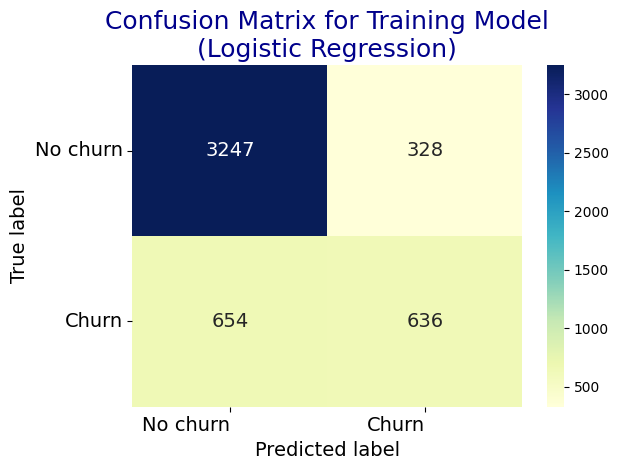

In [23]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred_lr)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

**Testing Model Performance - Displaying Metrics**

After we create the model, then do the calculations to get the classification report on the data testing use `classification_report()`

In [24]:
# Predict
y_test_pred_lr = lr.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test,y_test_pred_lr))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1539
           1       0.63      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.73      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



**Testing Model Performance - Displaying Plots**

After getting the results of the classification report in the previous stage, we can also display the confusion matrix for data testing. This confusion matrix is ​​obtained using the `confusion_matrix` and can be visualized using a heatmap from `seaborn`.

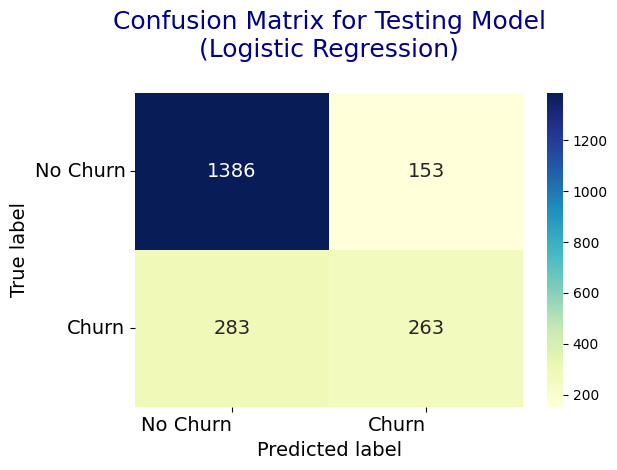

In [25]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred_lr)),('No Churn','Churn'),('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

# **Modelling : Random Forest Classifier**

**Creating Model**

Next we will create a model using the Random Forest Classifier Algorithm.
* Use `RandomForestClassifier()`  to call the algorithm
* fit it to the train data and save it as `rdf_model`

In [26]:
#Train the model
rdf = RandomForestClassifier(random_state=42)
rdf.fit(x_train,y_train)
print(rdf)

RandomForestClassifier(random_state=42)


**Training Model Performance - Displaying Metrics**

After we create the model, then do the calculations to get the classification report on the training data use `classification_report()`

In [27]:
y_train_pred_rdf = rdf.predict(x_train)
print('Classification Report Training Model (Random Forest Classifier):')
print(classification_report(y_train,y_train_pred_rdf))

Classification Report Training Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



**Training Model Performance - Displaying Plots**

After getting the results of the classification report in the previous stage, we can also display the confusion matrix. This confusion matrix is ​​obtained using the `confusion_matrix` and can be visualized using a heatmap from `seaborn`.

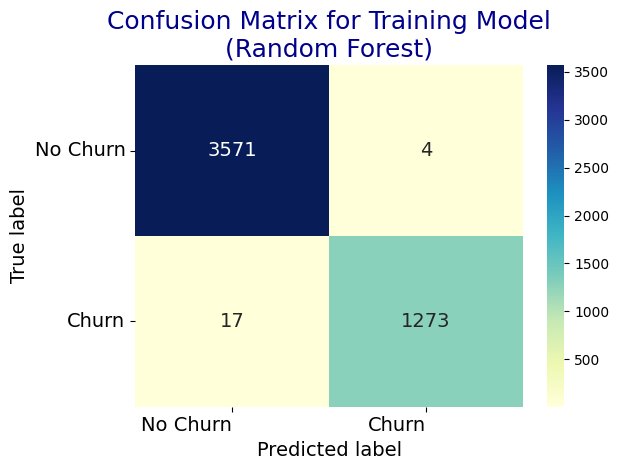

In [28]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred_rdf)), ('No Churn','Churn'), ('No Churn','Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

**Testing Model Performance - Displaying Metrics**

After we create the model, then do the calculations to get the classification report on the data testing use `classification_report()`

In [29]:
# Predict
y_test_pred_rdf = rdf.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test,y_test_pred_rdf))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1539
           1       0.59      0.48      0.53       546

    accuracy                           0.78      2085
   macro avg       0.71      0.68      0.69      2085
weighted avg       0.76      0.78      0.77      2085



**Testing Model Performance - Displaying Plots**

After getting the results of the classification report in the previous stage, we can also display the confusion matrix for data testing. This confusion matrix is ​​obtained using the `confusion_matrix` and can be visualized using a heatmap from `seaborn`.

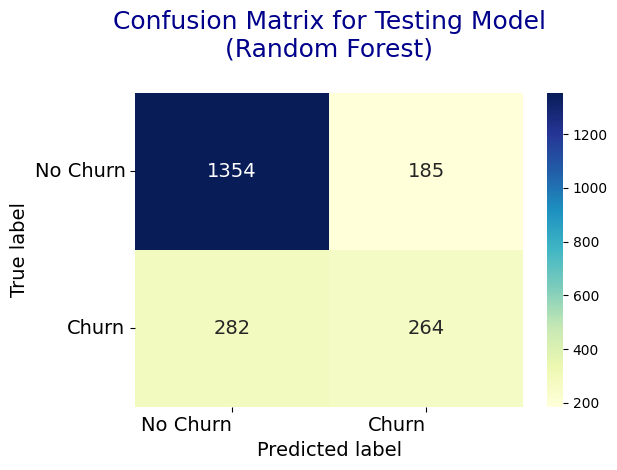

In [30]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred_rdf)), ('No Churn','Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

# **Modelling: Gradient Boosting Classifier**

The next model can be made using the Gradient Boosting Classifier Algorithm.


* Use `GradientBoostingClassifier()`  to call the algorithm
* fit it to the train data and save it as `gbt_model`

In [31]:
#Train the model
gbt = GradientBoostingClassifier().fit(x_train,y_train)
print(gbt)

GradientBoostingClassifier()


**Training Model Performance - Displaying Metrics**

After we create the model, then do the calculations to get the classification report on the training data use `classification_report()`

In [32]:
# Predict
y_train_pred_gbt = gbt.predict(x_train)
# Print classification report
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_train,y_train_pred_gbt))

Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3575
           1       0.70      0.53      0.60      1290

    accuracy                           0.82      4865
   macro avg       0.77      0.72      0.74      4865
weighted avg       0.81      0.82      0.81      4865



**Training Model Performance - Displaying Plots**

After getting the results of the classification report in the previous stage, we can also display the confusion matrix. This confusion matrix is ​​obtained using the `confusion_matrix` and can be visualized using a heatmap from `seaborn`.

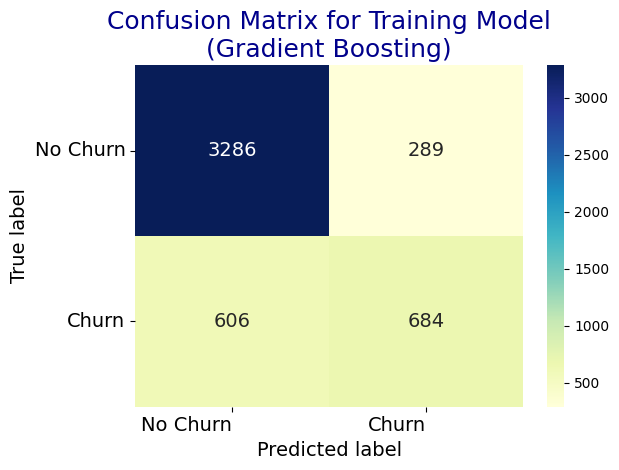

In [33]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred_gbt)), ('No Churn', 'Churn'), ('No Churn','Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

**Testing Model Performance - Displaying Metrics**

After we create the model, then do the calculations to get the classification report on the data testing use `classification_report()`

In [34]:
# Predict
y_test_pred_gbt = gbt.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test,y_test_pred_gbt))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1539
           1       0.62      0.41      0.50       546

    accuracy                           0.78      2085
   macro avg       0.72      0.66      0.68      2085
weighted avg       0.76      0.78      0.76      2085



**Testing Model Performance - Displaying Plots**

After getting the results of the classification report in the previous stage, we can also display the confusion matrix for data testing. This confusion matrix is ​​obtained using the `confusion_matrix` and can be visualized using a heatmap from `seaborn`.

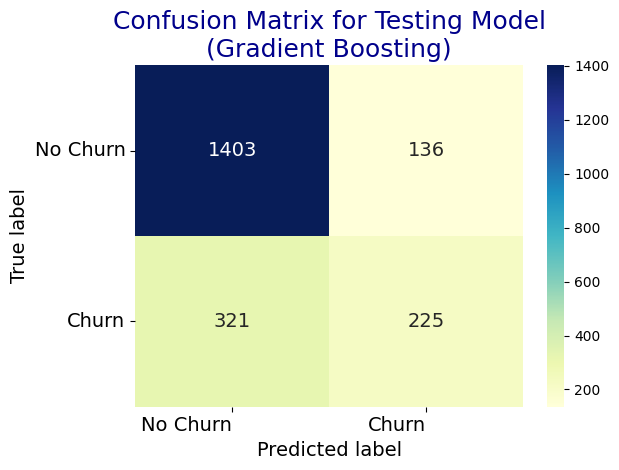

In [35]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred_gbt)), ('No Churn','Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

## **Determining the Best Model Algorithm**

A good model is a model that is able to provide good performance in the training and testing phases of the model.

* `Over-fitting` is a condition where the model is able to predict very well in the training phase, but is unable to predict as well in the testing phase.
* `Under-Fitting` is a condition where the model is unable to predict well in the training phase, but is able to predict well in the testing phase.
* `Appropriate-Fitting` is a condition where the model is able to predict well both in the training phase and in the testing phase.

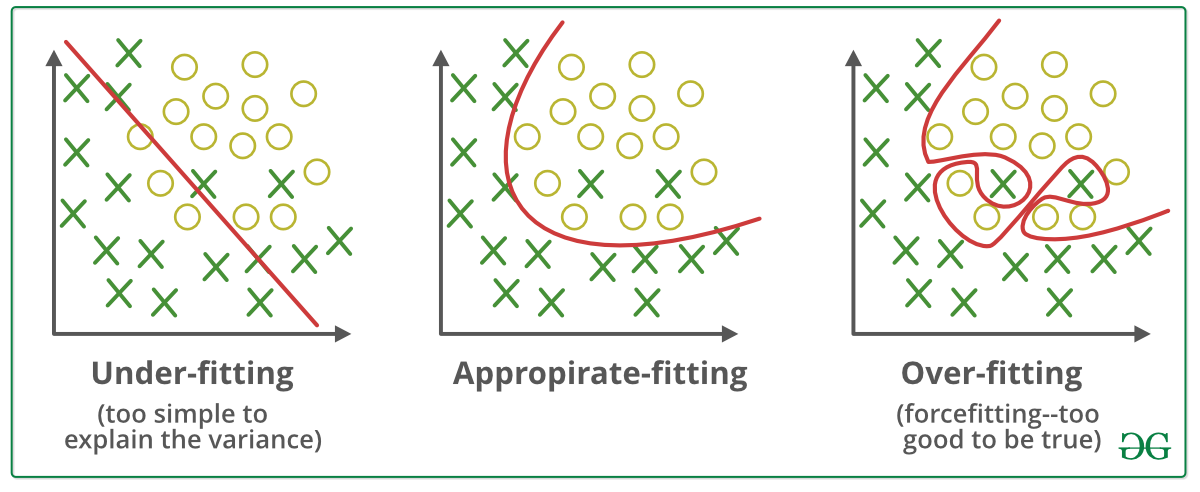

Next, we will determine the best algorithm model from the model that has been done above (Appropriate-Fitting), then we save it as the best_model_churn.pkl file with the aim of deploying the model later. We don't need to repeat the modeling again, just call the file. Save it in the file directory according to the dataset, then check whether the file is saved or not. Use dump() from pickle to save the file. You can use the code below to save the model file to try on your own local laptop.

`pickle.dump(log_model, open('best_model_churn.pkl', 'wb'))`



**Model Selection**

In [36]:
print('To Prevent False Positive (Churn Customer predicted as No Churn Customer), Precision is the best Metrics to consider the Best Model')
print(' ')
# Define a dictionary containing the models and their predictions for training and testing
models = {
    "Gradient Boosting": (y_train_pred_gbt, y_test_pred_gbt),
    "Random Forest": (y_train_pred_rdf, y_test_pred_rdf),
    "Logistic Regression": (y_train_pred_lr, y_test_pred_lr)
}

# Initialize a dictionary to store the precision results for each class (0 and 1)
precision_results = {
    "Model": [],
    "precision Train (Class 0)": [],
    "precision Train (Class 1)": [],
    "precision Test (Class 0)": [],
    "precision Test (Class 1)": []
}

# Loop through each model to compute the precision scores
for model_name, (train_pred, test_pred) in models.items():
    # Generate the classification report as a dictionary for training data
    report_train = classification_report(y_train, train_pred, output_dict=True)

    # Generate the classification report as a dictionary for testing data
    report_test = classification_report(y_test, test_pred, output_dict=True)

    # Extract the precision for class 0 and class 1 from the training report
    precision_train_class_0 = report_train['0']['precision']
    precision_train_class_1 = report_train['1']['precision']

    # Extract the precision for class 0 and class 1 from the testing report
    precision_test_class_0 = report_test['0']['precision']
    precision_test_class_1 = report_test['1']['precision']

    # Append the results to the precision_results dictionary
    precision_results["Model"].append(model_name)
    precision_results["precision Train (Class 0)"].append(precision_train_class_0)
    precision_results["precision Train (Class 1)"].append(precision_train_class_1)
    precision_results["precision Test (Class 0)"].append(precision_test_class_0)
    precision_results["precision Test (Class 1)"].append(precision_test_class_1)

# Convert the precision_results dictionary to a DataFrame
df_precision_results = pd.DataFrame(precision_results)

# Print the resulting DataFrame to display the precision scores for each model
df_precision_results

To Prevent False Positive (Churn Customer predicted as No Churn Customer), Precision is the best Metrics to consider the Best Model
 


,Model,precision Train (Class 0),precision Train (Class 1),precision Test (Class 0),precision Test (Class 1)
0,Gradient Boosting,0.844296,0.702980,0.813805,0.623269
1,Random Forest,0.995262,0.996868,0.827628,0.587973
2,Logistic Regression,0.832351,0.659751,0.830437,0.632212


**Model Selection Result :**
<br>`Logistic Regression()` chosen as the model because to prevent False Positive (Churn Customer predicted as No Churn Customer) `Logistic Regression()` has the best **Precision** among other Models in the Testing Performance
<br>
<br>
- To choose the best model for customer churn classification based on the data you provide, we can consider several factors, such as:
-	Precision: Precision measures how precise the model is in predicting the positive class (in this case, Class 1 - customer churn). The higher the precision, the fewer false positives the model predicts.
-	From the table you provided, here are some insights for each model:
  -	`Gradient Boosting`: Has fairly good precision for both classes in training and testing data, with higher precision for Class 0 in training and Class 0 in testing.
	- `Random Forest`: Has very high precision for both classes in the training data (especially for Class 0 and Class 1), but the precision for Class 0 and Class 1 decreases in the testing data. This indicates that the model is overfitting on the training data.
  -	`Logistic Regression`: Has fairly stable precision for both classes in training and testing data, with more balanced performance for Class 0 and Class 1 than other models.


**Prediction**

In [37]:
# Let's Predict Churn Customer!
df_test = df_load.copy()

In [38]:
print('The number of duplication is:', df_test.duplicated().sum())
# there is no duplication

The number of duplication is: 0


In [39]:
# Inspect Data Testing
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6950 non-null   int64  
 1   customerID        6950 non-null   int64  
 2   gender            6950 non-null   object 
 3   SeniorCitizen     6950 non-null   object 
 4   Partner           6950 non-null   object 
 5   tenure            6950 non-null   int64  
 6   PhoneService      6950 non-null   object 
 7   StreamingTV       6950 non-null   object 
 8   InternetService   6950 non-null   object 
 9   PaperlessBilling  6950 non-null   object 
 10  MonthlyCharges    6950 non-null   float64
 11  TotalCharges      6950 non-null   float64
 12  Churn             6950 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 706.0+ KB


In [40]:
# Top 5 Rows of Data Testing
df_test.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


In [41]:
# Check for empty elements
print('Missing values status:', df_test.isnull().values.any())
df_null = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
df_null['Percentage'] = (df_null['Total Null Values']/df_test.shape[0])*100
df_null = df_null.sort_values(by=['Percentage'], ascending=False).reset_index()
df_null

Missing values status: False


,index,Total Null Values,Percentage
0,UpdatedAt,0,0.0
1,customerID,0,0.0
2,gender,0,0.0
3,SeniorCitizen,0,0.0
4,Partner,0,0.0
5,tenure,0,0.0
6,PhoneService,0,0.0
7,StreamingTV,0,0.0
8,InternetService,0,0.0
9,PaperlessBilling,0,0.0


In [42]:
# Inspect Data Test again to ensure!
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6950 non-null   int64  
 1   customerID        6950 non-null   int64  
 2   gender            6950 non-null   object 
 3   SeniorCitizen     6950 non-null   object 
 4   Partner           6950 non-null   object 
 5   tenure            6950 non-null   int64  
 6   PhoneService      6950 non-null   object 
 7   StreamingTV       6950 non-null   object 
 8   InternetService   6950 non-null   object 
 9   PaperlessBilling  6950 non-null   object 
 10  MonthlyCharges    6950 non-null   float64
 11  TotalCharges      6950 non-null   float64
 12  Churn             6950 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 706.0+ KB


In [43]:
#Encoding Features
cleaned_df_test = df_test.drop(['UpdatedAt'], axis=1)
cleaned_df_test.set_index('customerID', inplace=True)

#Convert all the non-numeric columns to numerical data types
for column in cleaned_df_test.columns:
    if cleaned_df_test[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
    cleaned_df_test[column] = LabelEncoder().fit_transform(df_test[column])
cleaned_df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,6950.0,0.504317,0.500017,0.0,0.0000,1.00,1.0000,1.00000
SeniorCitizen,6950.0,0.162302,0.368754,0.0,0.0000,0.00,0.0000,1.00000
Partner,6950.0,0.483309,0.499757,0.0,0.0000,0.00,1.0000,1.00000
tenure,6950.0,32.415827,24.561336,0.0,9.0000,29.00,55.0000,73.00000
PhoneService,6950.0,0.903741,0.294967,0.0,1.0000,1.00,1.0000,1.00000
StreamingTV,6950.0,0.384317,0.486468,0.0,0.0000,0.00,1.0000,1.00000
InternetService,6950.0,0.783453,0.411921,0.0,1.0000,1.00,1.0000,1.00000
PaperlessBilling,6950.0,0.591942,0.491509,0.0,0.0000,1.00,1.0000,1.00000
MonthlyCharges,6950.0,64.992201,30.032040,0.0,36.4625,70.45,89.8500,169.93125
TotalCharges,6950.0,2286.058750,2265.702553,19.0,406.9750,1400.85,3799.8375,8889.13125


In [44]:
pred_test = cleaned_df_test.drop('Churn', axis = 1)
pred_test.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,
45759018157,0,0,1,1,0,0,1,1,29.85,29.85
45315483266,1,0,1,60,1,0,0,1,20.50,1198.80
45236961615,1,0,0,5,1,1,1,0,104.10,541.90
45929827382,0,0,1,72,1,1,1,1,115.50,8312.75
45305082233,0,0,1,56,1,1,1,0,81.25,4620.40


In [45]:
# Standardize the Data

# Function to fit the scaler
def fit_scaler(data: pd.DataFrame):
    """
    Fit a StandardScaler on the input data.

    Parameters:
        data (pd.DataFrame): The input DataFrame with numerical columns.

    Returns:
        StandardScaler: The fitted scaler object.
    """
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler

# Function to transform data using the fitted scaler
def transform_scaler(data: pd.DataFrame, scaler: StandardScaler):
    """
    Transform the data using a fitted StandardScaler.

    Parameters:
        data (pd.DataFrame): The input DataFrame with numerical columns.
        scaler (StandardScaler): The fitted scaler object.

    Returns:
        pd.DataFrame: The scaled DataFrame.
    """
    scaled_data = scaler.transform(data)
    return pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

In [46]:
# Fit the scaler!
scaler = fit_scaler(pred_test)

# Transform the scaler
pred_test = transform_scaler(pred_test, scaler)

In [47]:
# Describe the pred_test!
pred_test.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,6950.0,-1.778913e-16,1.000072,-1.008671,-1.008671,0.991404,0.991404,0.991404
SeniorCitizen,6950.0,8.178909e-18,1.000072,-0.440168,-0.440168,-0.440168,-0.440168,2.271860
Partner,6950.0,-1.088817e-16,1.000072,-0.967158,-0.967158,-0.967158,1.033958,1.033958
tenure,6950.0,1.226836e-17,1.000072,-1.319886,-0.953430,-0.139083,0.919567,1.652479
PhoneService,6950.0,2.494567e-16,1.000072,-3.064089,0.326361,0.326361,0.326361,0.326361
StreamingTV,6950.0,1.789136e-17,1.000072,-0.790070,-0.790070,-0.790070,1.265710,1.265710
InternetService,6950.0,8.996800e-17,1.000072,-1.902088,0.525738,0.525738,0.525738,0.525738
PaperlessBilling,6950.0,-5.853032e-17,1.000072,-1.204423,-1.204423,0.830273,0.830273,0.830273
MonthlyCharges,6950.0,3.373800e-17,1.000072,-2.164251,-0.950044,0.181746,0.827769,3.494488
TotalCharges,6950.0,-6.185300e-17,1.000072,-1.000671,-0.829420,-0.390728,0.668176,2.914570


In [48]:
# lets predict!
predict = pd.Series(lr.predict(pred_test), name = 'Churn').astype(int)
results = pd.concat([df_test['customerID'], predict],axis = 1)
results.rename(columns = {'Churn':'Churn_pred'}, inplace = True)
results.sort_values(by='Churn_pred',ascending=True).reset_index(drop=True)

,customerID,Churn_pred
0,45912768025,0
1,45905888591,0
2,45452211428,0
3,45030364396,0
4,45062106852,0
...,...,...
6945,45766505124,1
6946,45627544615,1
6947,45560613525,1
6948,45721881761,1


In [49]:
# Summarize Predicted Result!
results_summary = results.groupby('Churn_pred').agg(customer_cnt=('customerID','count')).reset_index()
results_summary['Churn_Meaning'] = ['No','Yes']
results_summary = results_summary[['Churn_pred','Churn_Meaning','customer_cnt']]
print('Churn Customer after predicted :')
results_summary

Churn Customer after predicted :


,Churn_pred,Churn_Meaning,customer_cnt
0,0,No,5561
1,1,Yes,1389


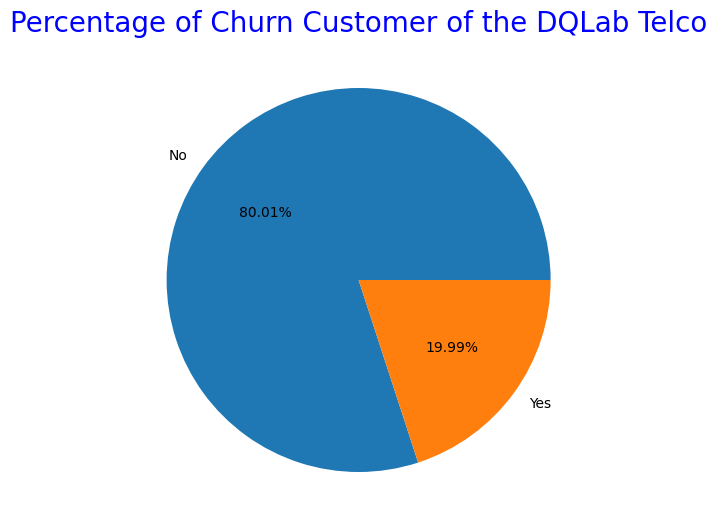

In [50]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
churn = results.Churn_pred.value_counts()
ax.pie(churn, labels=labels, autopct= '%.2f%%')
plt.title(label = 'Percentage of Churn Customer of the DQLab Telco',
          size = 20,
          color = 'blue')
plt.show()

In [51]:
df = results.copy()

def churn_meaning(data):
  if data == 0:
    return 'No'
  elif data == 1:
    return 'Yes'

df['Churn_Meaning'] = df['Churn_pred'].apply(churn_meaning)
df

,customerID,Churn_pred,Churn_Meaning
0,45759018157,1,Yes
1,45315483266,0,No
2,45236961615,1,Yes
3,45929827382,0,No
4,45305082233,0,No
...,...,...,...
6945,45437311872,0,No
6946,45184632574,1,Yes
6947,45023517923,1,Yes
6948,45665022680,0,No


[Text(0, 0, '1389 (19.99%)'), Text(0, 0, '5561 (80.01%)')]

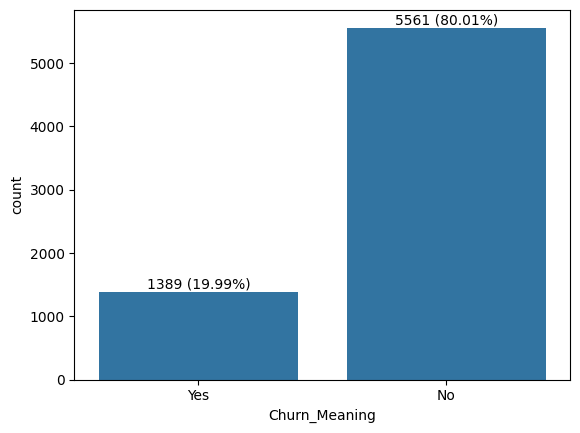

In [52]:
ax = sns.countplot(x=df['Churn_Meaning'],
                   order=df['Churn_Meaning'].value_counts(ascending=True).index);

abs_values = df['Churn_Meaning'].value_counts(ascending=True)
rel_values = df['Churn_Meaning'].value_counts(ascending=True, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.2f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

# **Predict with other Model!**

In [53]:
# Import New Model!
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier

**Modelling: Support Vector Machine (SVM)**

In [54]:
# Train the SVM model
svm = SVC(probability=True).fit(x_train, y_train)
print(svm)

SVC(probability=True)


In [55]:
# Predict on training data
y_train_pred_svm = svm.predict(x_train)
# Print classification report for training data
print('Classification Report Training Model (SVM):')
print(classification_report(y_train, y_train_pred_svm))

Classification Report Training Model (SVM):
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3575
           1       0.69      0.45      0.54      1290

    accuracy                           0.80      4865
   macro avg       0.76      0.69      0.71      4865
weighted avg       0.79      0.80      0.79      4865



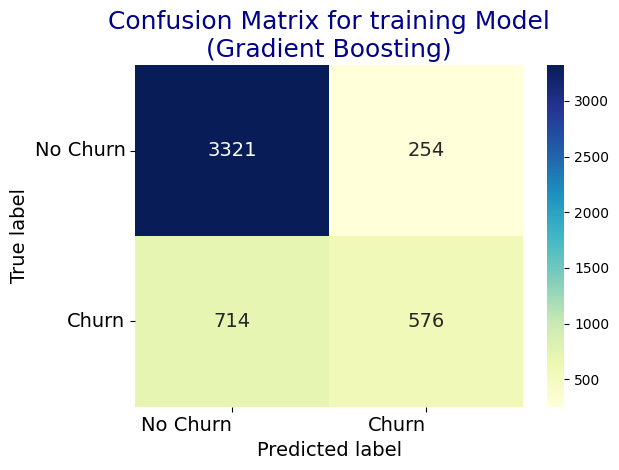

In [56]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred_svm)), ('No Churn','Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [57]:
# Predict on testing data
y_test_pred_svm = svm.predict(x_test)
# Print classification report for testing data
print('Classification Report Testing Model (SVM):')
print(classification_report(y_test, y_test_pred_svm))

Classification Report Testing Model (SVM):
              precision    recall  f1-score   support

           0       0.81      0.92      0.87      1539
           1       0.66      0.41      0.50       546

    accuracy                           0.79      2085
   macro avg       0.74      0.67      0.68      2085
weighted avg       0.77      0.79      0.77      2085



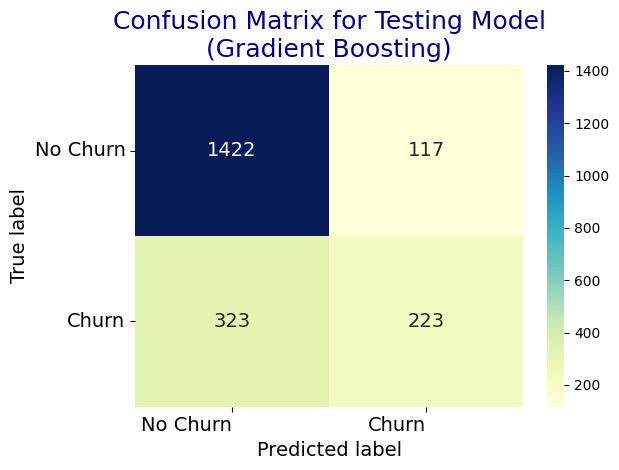

In [58]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred_svm)), ('No Churn','Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

**Modelling: K-Nearest Neighbors (KNN)**

In [59]:
# Train the model
knn = KNeighborsClassifier().fit(x_train, y_train)
print(knn)

KNeighborsClassifier()


In [60]:
# Predict
y_train_pred_knn = knn.predict(x_train)

# Print classification report
print('Classification Report Training Model (KNN):')
print(classification_report(y_train, y_train_pred_knn))

Classification Report Training Model (KNN):
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      3575
           1       0.72      0.61      0.66      1290

    accuracy                           0.83      4865
   macro avg       0.79      0.76      0.78      4865
weighted avg       0.83      0.83      0.83      4865



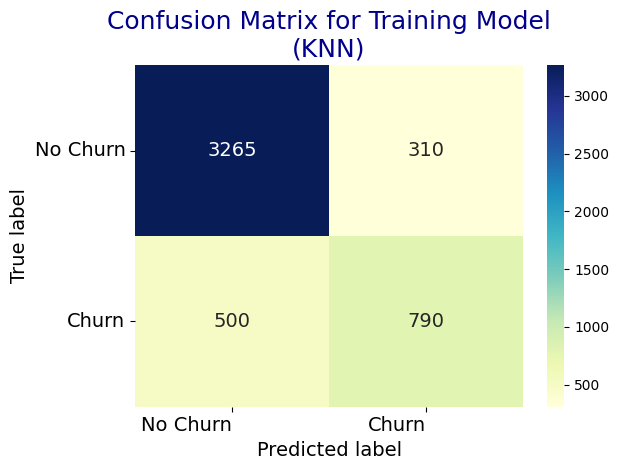

In [61]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_train, y_train_pred_knn), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(KNN)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [62]:
# Predict
y_test_pred_knn = knn.predict(x_test)

# Print classification report
print('Classification Report Testing Model (KNN):')
print(classification_report(y_test, y_test_pred_knn))

Classification Report Testing Model (KNN):
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1539
           1       0.54      0.49      0.51       546

    accuracy                           0.76      2085
   macro avg       0.68      0.67      0.68      2085
weighted avg       0.75      0.76      0.75      2085



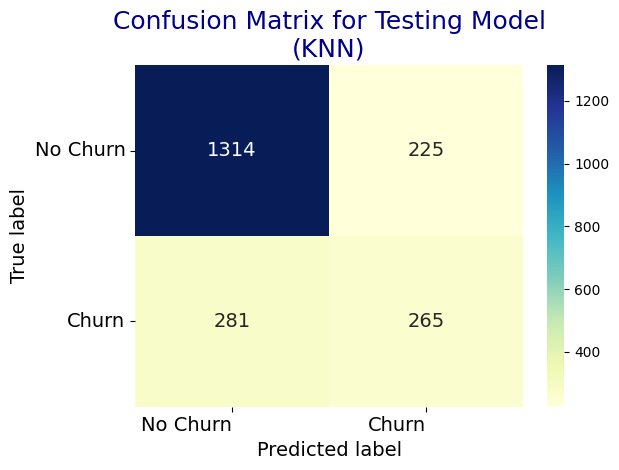

In [63]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred_knn), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(KNN)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

**Modelling: XGBoost Classifier**

In [64]:
# Train the XGBoost model
xgb = XGBClassifier().fit(x_train, y_train)
print(xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [65]:
# Predict on training data
y_train_pred_xgb = xgb.predict(x_train)
# Print classification report for training data
print('Classification Report Training Model (XGBoost):')
print(classification_report(y_train, y_train_pred_xgb))

Classification Report Training Model (XGBoost):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3575
           1       0.88      0.76      0.82      1290

    accuracy                           0.91      4865
   macro avg       0.90      0.86      0.88      4865
weighted avg       0.91      0.91      0.91      4865



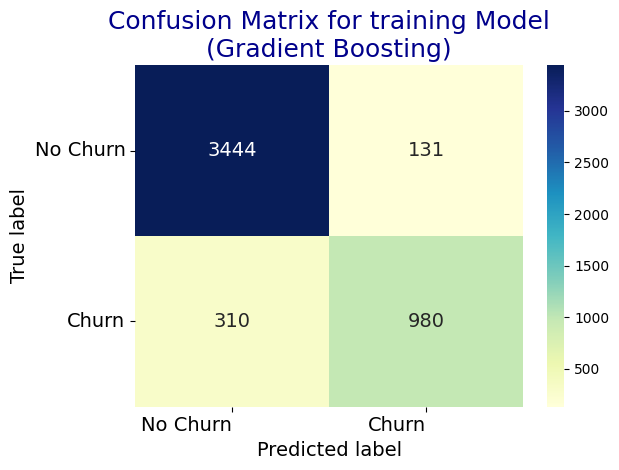

In [66]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred_xgb)), ('No Churn','Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [67]:
# Predict on testing data
y_test_pred_xgb = xgb.predict(x_test)
# Print classification report for testing data
print('Classification Report Testing Model (XGBoost):')
print(classification_report(y_test, y_test_pred_xgb))

Classification Report Testing Model (XGBoost):
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      1539
           1       0.65      0.18      0.28       546

    accuracy                           0.76      2085
   macro avg       0.71      0.57      0.57      2085
weighted avg       0.74      0.76      0.70      2085



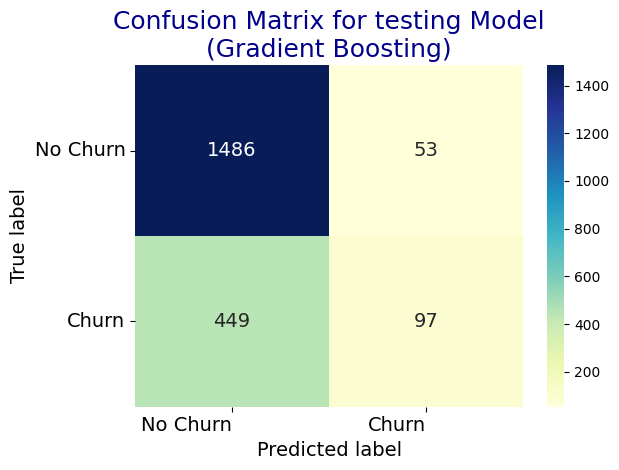

In [68]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred_xgb)), ('No Churn','Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

**Modelling: Neural Network (MLPClassifier)**

In [69]:
# Train the Neural Network model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42).fit(x_train, y_train)
print(mlp)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)


In [70]:
# Predict on training data
y_train_pred_mlp = mlp.predict(x_train)
# Print classification report for training data
print('Classification Report Training Model (MLP):')
print(classification_report(y_train, y_train_pred_mlp))

Classification Report Training Model (MLP):
              precision    recall  f1-score   support

           0       0.85      0.93      0.88      3575
           1       0.73      0.53      0.61      1290

    accuracy                           0.82      4865
   macro avg       0.79      0.73      0.75      4865
weighted avg       0.81      0.82      0.81      4865



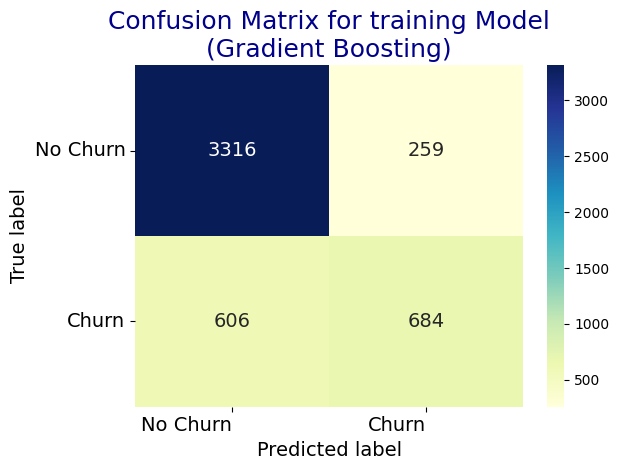

In [71]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred_mlp)), ('No Churn','Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [72]:
# Predict on testing data
y_test_pred_mlp = mlp.predict(x_test)
# Print classification report for testing data
print('Classification Report Testing Model (MLP):')
print(classification_report(y_test, y_test_pred_mlp))

Classification Report Testing Model (MLP):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1539
           1       0.61      0.47      0.53       546

    accuracy                           0.78      2085
   macro avg       0.72      0.68      0.69      2085
weighted avg       0.77      0.78      0.77      2085



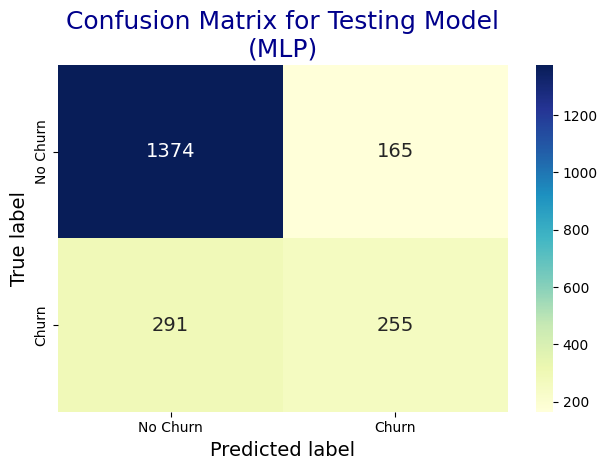

In [73]:
# Form confusion matrix for testing data
confusion_matrix_test_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred_mlp), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix for testing data
plt.figure()
sns.heatmap(confusion_matrix_test_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix for Testing Model\n(MLP)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

**Modelling: Decision Tree Classifier**

In [74]:
# Train the model
dt = DecisionTreeClassifier().fit(x_train, y_train)
print(dt)

DecisionTreeClassifier()


In [75]:
# Predict
y_train_pred_dt = dt.predict(x_train)

# Print classification report
print('Classification Report Training Model (Decision Tree):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3575
           1       1.00      0.98      0.99      1290

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



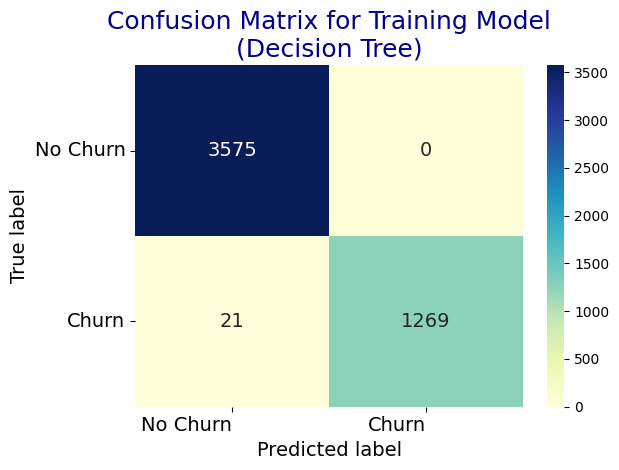

In [76]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_train, y_train_pred_dt), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Decision Tree)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [77]:
# Predict
y_test_pred_dt = dt.predict(x_test)

# Print classification report
print('Classification Report Testing Model (Decision Tree):')
print(classification_report(y_test, y_test_pred_dt))

Classification Report Testing Model (Decision Tree):
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1539
           1       0.46      0.49      0.47       546

    accuracy                           0.72      2085
   macro avg       0.64      0.64      0.64      2085
weighted avg       0.72      0.72      0.72      2085



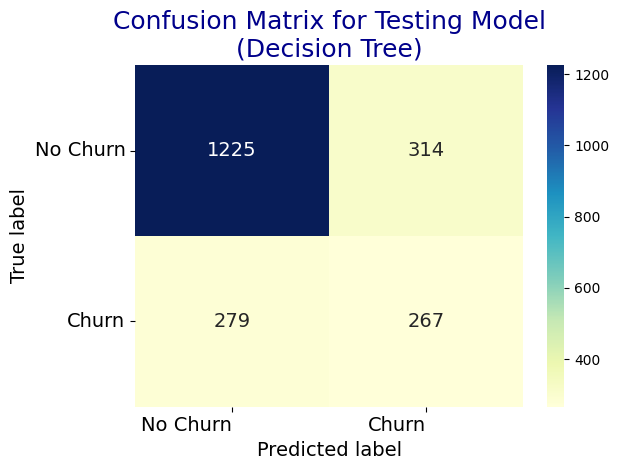

In [78]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred_dt), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

**Modelling: Adaboost Classifier**

In [79]:
# Train the model
ab = AdaBoostClassifier().fit(x_train, y_train)
print(ab)

AdaBoostClassifier()


In [80]:
# Predict
y_train_pred_ab = ab.predict(x_train)

# Print classification report
print('Classification Report Training Model (AdaBoost):')
print(classification_report(y_train, y_train_pred_ab))

Classification Report Training Model (AdaBoost):
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3575
           1       0.64      0.52      0.58      1290

    accuracy                           0.80      4865
   macro avg       0.74      0.71      0.72      4865
weighted avg       0.79      0.80      0.79      4865



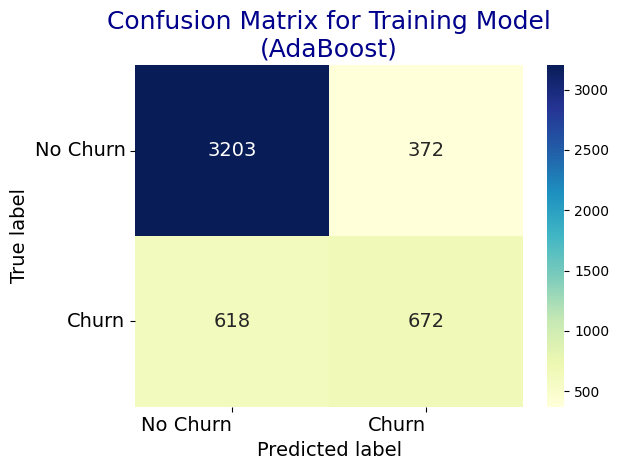

In [81]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_train, y_train_pred_ab), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(AdaBoost)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [82]:
# Predict
y_test_pred_ab = ab.predict(x_test)

# Print classification report
print('Classification Report Testing Model (AdaBoost):')
print(classification_report(y_test, y_test_pred_ab))

Classification Report Testing Model (AdaBoost):
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1539
           1       0.61      0.51      0.56       546

    accuracy                           0.79      2085
   macro avg       0.72      0.70      0.71      2085
weighted avg       0.78      0.79      0.78      2085



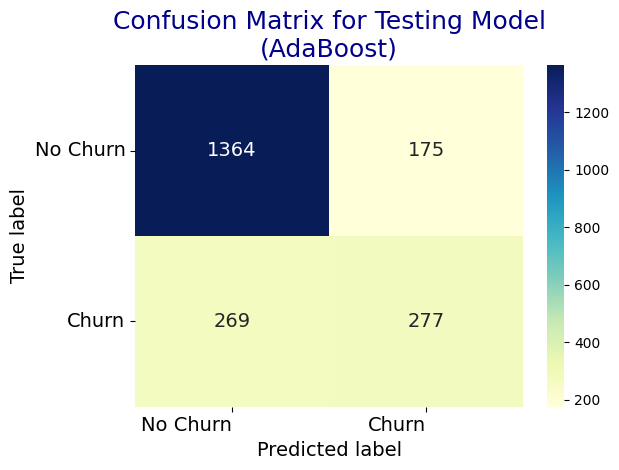

In [83]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred_ab), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(AdaBoost)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

**Modelling: LightGBM Classifier**

In [84]:
# Train the model
lgbm = lgb.LGBMClassifier().fit(x_train, y_train)
print(lgbm)

[LightGBM] [Info] Number of positive: 1290, number of negative: 3575
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 605
[LightGBM] [Info] Number of data points in the train set: 4865, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265159 -> initscore=-1.019323
[LightGBM] [Info] Start training from score -1.019323
LGBMClassifier()


In [85]:
# Predict
y_train_pred_lgbm = lgbm.predict(x_train)

# Print classification report
print('Classification Report Training Model (LightGBM):')
print(classification_report(y_train, y_train_pred_lgbm))

Classification Report Training Model (LightGBM):
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3575
           1       0.80      0.65      0.72      1290

    accuracy                           0.86      4865
   macro avg       0.84      0.79      0.81      4865
weighted avg       0.86      0.86      0.86      4865



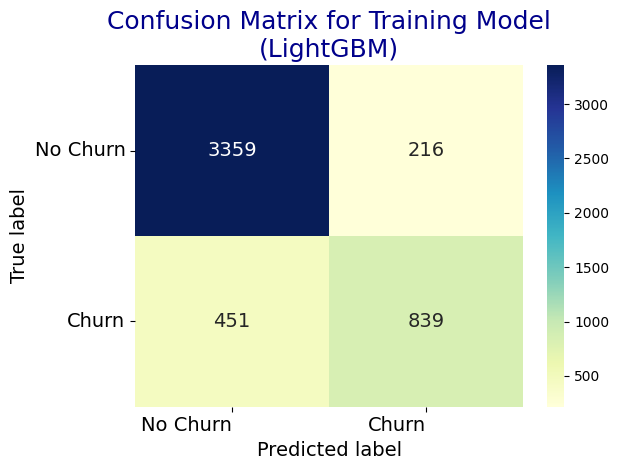

In [86]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_train, y_train_pred_lgbm), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(LightGBM)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [87]:
# Predict
y_test_pred_lgbm = lgbm.predict(x_test)

# Print classification report
print('Classification Report Testing Model (LightGBM):')
print(classification_report(y_test, y_test_pred_lgbm))

Classification Report Testing Model (LightGBM):
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1539
           1       0.61      0.51      0.56       546

    accuracy                           0.79      2085
   macro avg       0.72      0.70      0.71      2085
weighted avg       0.78      0.79      0.78      2085



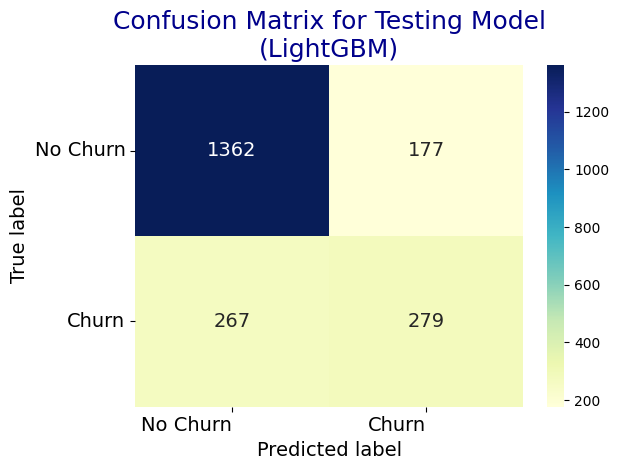

In [88]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred_lgbm), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(LightGBM)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

**Modelling: Gaussian Naive Bayes**

In [89]:
# Train the model
nb = GaussianNB().fit(x_train, y_train)
print(nb)

GaussianNB()


In [90]:
# Predict
y_train_pred_nb = nb.predict(x_train)

# Print classification report
print('Classification Report Training Model (Naive Bayes):')
print(classification_report(y_train, y_train_pred_nb))

Classification Report Training Model (Naive Bayes):
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      3575
           1       0.51      0.72      0.59      1290

    accuracy                           0.74      4865
   macro avg       0.69      0.73      0.70      4865
weighted avg       0.78      0.74      0.75      4865



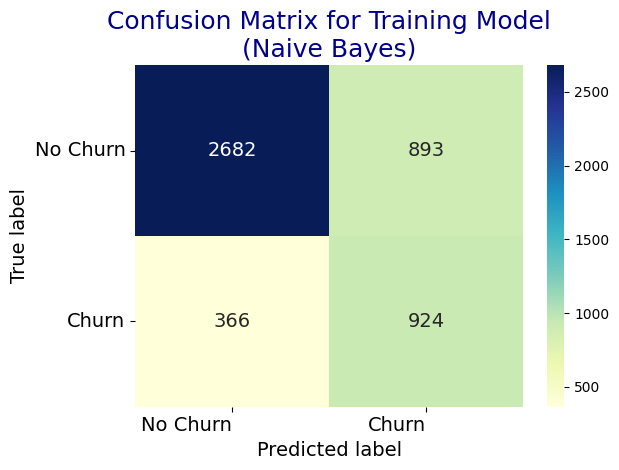

In [91]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_train, y_train_pred_nb), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Naive Bayes)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [92]:
# Predict
y_test_pred_nb = nb.predict(x_test)

# Print classification report
print('Classification Report Testing Model (Naive Bayes):')
print(classification_report(y_test, y_test_pred_nb))

Classification Report Testing Model (Naive Bayes):
              precision    recall  f1-score   support

           0       0.87      0.75      0.80      1539
           1       0.49      0.68      0.57       546

    accuracy                           0.73      2085
   macro avg       0.68      0.72      0.69      2085
weighted avg       0.77      0.73      0.74      2085



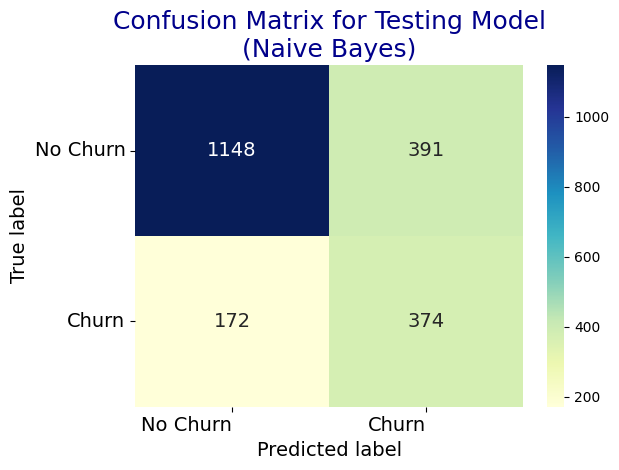

In [93]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred_nb), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Naive Bayes)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

**Modelling: CatBoost Classifier**

In [94]:
# Train the model
cat = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6).fit(x_train, y_train)
print(cat)

0:	learn: 0.6554981	total: 48.3ms	remaining: 4.79s
1:	learn: 0.6242637	total: 50.7ms	remaining: 2.48s
2:	learn: 0.5984504	total: 52.5ms	remaining: 1.7s
3:	learn: 0.5767465	total: 54.5ms	remaining: 1.31s
4:	learn: 0.5583582	total: 57.1ms	remaining: 1.08s
5:	learn: 0.5420647	total: 58.9ms	remaining: 923ms
6:	learn: 0.5280477	total: 60.8ms	remaining: 807ms
7:	learn: 0.5160242	total: 62.6ms	remaining: 720ms
8:	learn: 0.5053459	total: 64.4ms	remaining: 651ms
9:	learn: 0.4957869	total: 66.2ms	remaining: 596ms
10:	learn: 0.4876300	total: 68.1ms	remaining: 551ms
11:	learn: 0.4806041	total: 69.7ms	remaining: 511ms
12:	learn: 0.4743703	total: 71.6ms	remaining: 479ms
13:	learn: 0.4691463	total: 73.6ms	remaining: 452ms
14:	learn: 0.4637761	total: 77ms	remaining: 436ms
15:	learn: 0.4602898	total: 78.3ms	remaining: 411ms
16:	learn: 0.4562089	total: 80.9ms	remaining: 395ms
17:	learn: 0.4522894	total: 82.5ms	remaining: 376ms
18:	learn: 0.4487963	total: 84ms	remaining: 358ms
19:	learn: 0.4461874	total:

In [95]:
# Predict
y_train_pred_cat = cat.predict(x_train)

# Print classification report
print('Classification Report Training Model (CatBoost):')
print(classification_report(y_train, y_train_pred_cat))

Classification Report Training Model (CatBoost):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3575
           1       0.70      0.52      0.59      1290

    accuracy                           0.81      4865
   macro avg       0.77      0.72      0.74      4865
weighted avg       0.80      0.81      0.80      4865



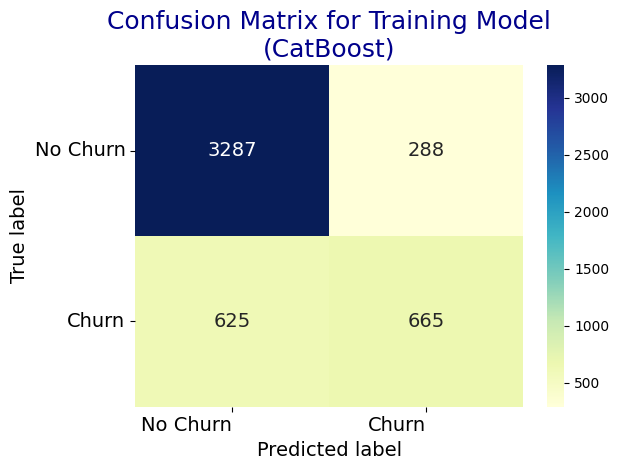

In [96]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_train, y_train_pred_cat), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(CatBoost)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [97]:
# Predict
y_test_pred_cat = cat.predict(x_test)

# Print classification report
print('Classification Report Testing Model (CatBoost):')
print(classification_report(y_test, y_test_pred_cat))

Classification Report Testing Model (CatBoost):
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.65      0.50      0.57       546

    accuracy                           0.80      2085
   macro avg       0.74      0.70      0.72      2085
weighted avg       0.79      0.80      0.79      2085



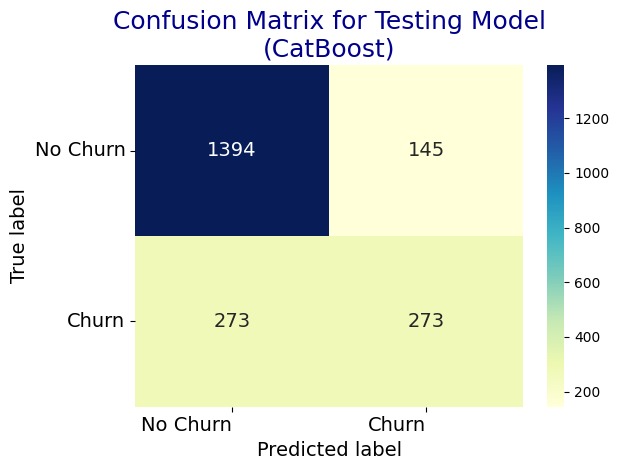

In [98]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred_cat), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(CatBoost)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [99]:
print('To Prevent False Positive (Churn Customer predicted as No Churn Customer), Precision is the best Metrics to consider the Best Model')
print(' ')
# Define a dictionary containing the models and their predictions for training and testing
models = {
    "Gradient Boosting": (y_train_pred_gbt, y_test_pred_gbt),
    "Random Forest": (y_train_pred_rdf, y_test_pred_rdf),
    "Logistic Regression": (y_train_pred_lr, y_test_pred_lr),
    "Support Vector Machine (SVM)": (y_train_pred_svm, y_test_pred_svm),
    "K-Nearest Neighbors (KNN)": (y_train_pred_knn, y_test_pred_knn),
    "XGBoost Classifier": (y_train_pred_xgb, y_test_pred_xgb),
    "Neural Network (MLPClassifier)": (y_train_pred_mlp, y_test_pred_mlp),
    "Decision Tree": (y_train_pred_dt, y_test_pred_dt),
    "AdaBoost": (y_train_pred_ab, y_test_pred_ab),
    "LightGBM": (y_train_pred_lgbm, y_test_pred_lgbm),
    "Naive Bayes": (y_train_pred_nb, y_test_pred_nb),
    "CatBoost": (y_train_pred_cat, y_test_pred_cat)
}

# Initialize a dictionary to store the precision results for each class (0 and 1)
precision_results = {
    "Model": [],
    "precision Train (Class 0)": [],
    "precision Train (Class 1)": [],
    "precision Test (Class 0)": [],
    "precision Test (Class 1)": []
}

# Loop through each model to compute the precision scores
for model_name, (train_pred, test_pred) in models.items():
    # Generate the classification report as a dictionary for training data
    report_train = classification_report(y_train, train_pred, output_dict=True)

    # Generate the classification report as a dictionary for testing data
    report_test = classification_report(y_test, test_pred, output_dict=True)

    # Extract the precision for class 0 and class 1 from the training report
    precision_train_class_0 = report_train['0']['precision']
    precision_train_class_1 = report_train['1']['precision']

    # Extract the precision for class 0 and class 1 from the testing report
    precision_test_class_0 = report_test['0']['precision']
    precision_test_class_1 = report_test['1']['precision']

    # Append the results to the precision_results dictionary
    precision_results["Model"].append(model_name)
    precision_results["precision Train (Class 0)"].append(precision_train_class_0)
    precision_results["precision Train (Class 1)"].append(precision_train_class_1)
    precision_results["precision Test (Class 0)"].append(precision_test_class_0)
    precision_results["precision Test (Class 1)"].append(precision_test_class_1)

# Convert the precision_results dictionary to a DataFrame
df_precision_results = pd.DataFrame(precision_results)
df_precision_results = df_precision_results.sort_values(by=['precision Test (Class 0)', 'precision Test (Class 1)'], ascending=False).reset_index(drop=True)

# Print the resulting DataFrame to display the precision scores for each model
df_precision_results

To Prevent False Positive (Churn Customer predicted as No Churn Customer), Precision is the best Metrics to consider the Best Model
 


,Model,precision Train (Class 0),precision Train (Class 1),precision Test (Class 0),precision Test (Class 1)
0,Naive Bayes,0.879921,0.508531,0.869697,0.488889
1,CatBoost,0.840235,0.697796,0.836233,0.653110
2,LightGBM,0.881627,0.795261,0.836096,0.611842
3,AdaBoost,0.838262,0.643678,0.835273,0.612832
4,Logistic Regression,0.832351,0.659751,0.830437,0.632212
5,Random Forest,0.995262,0.996868,0.827628,0.587973
6,Neural Network (MLPClassifier),0.845487,0.725345,0.825225,0.607143
7,K-Nearest Neighbors (KNN),0.867198,0.718182,0.823824,0.540816
8,Support Vector Machine (SVM),0.823048,0.693976,0.814900,0.655882
9,Decision Tree,0.994160,1.000000,0.814495,0.459552


**Model Selection Result:**
- From the given table, the model that has the highest precision on the test set for both classes (Class 0 and Class 1) is `Gaussian Naive Bayes` on Class 0 with precision 0.869697 (86.97%) and Class 1 with precision 0.488889 (48.89%). However, the precision on Class 1 is quite low, which may indicate class imbalance.

- However, looking at the trade-off between the precision for both classes, the `CatBoost` model has a relatively balanced precision between the two classes in the test set: 0.836233 (83.62%) for Class 0 and 0.653110 (65.31%) for Class 1. The model offers quite good results in classifying both classes well.

If we look at the overall performance, `CatBoost` could be the best choice, mainly because of the balance in precision between the two classes and the better performance compared to other models, although it is not always the highest in each individual class.

In [100]:
# lets predict!
predict = pd.Series(cat.predict(pred_test), name = 'Churn').astype(int)
results = pd.concat([df_test['customerID'], predict],axis = 1)
results.rename(columns = {'Churn':'Churn_pred'}, inplace = True)
results.sort_values(by='Churn_pred',ascending=True).reset_index(drop=True)

,customerID,Churn_pred
0,45912768025,0
1,45646938150,0
2,45448472556,0
3,45864512805,0
4,45411524604,0
...,...,...
6945,45256509284,1
6946,45467841755,1
6947,45527617287,1
6948,45428243141,1


In [101]:
# Summarize Predicted Result!
results_summary = results.groupby('Churn_pred').agg(customer_cnt=('customerID','count')).reset_index()
results_summary['Churn_Meaning'] = ['No','Yes']
results_summary = results_summary[['Churn_pred','Churn_Meaning','customer_cnt']]
print('Churn Customer after predicted :')
results_summary

Churn Customer after predicted :


,Churn_pred,Churn_Meaning,customer_cnt
0,0,No,5570
1,1,Yes,1380


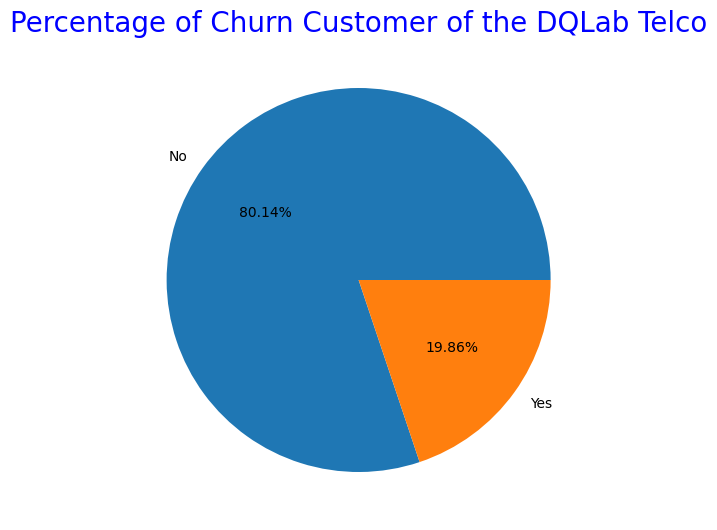

In [102]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
churn = results.Churn_pred.value_counts()
ax.pie(churn, labels=labels, autopct= '%.2f%%')
plt.title(label = 'Percentage of Churn Customer of the DQLab Telco',
          size = 20,
          color = 'blue')
plt.show()

In [103]:
df = results.copy()

def churn_meaning(data):
  if data == 0:
    return 'No'
  elif data == 1:
    return 'Yes'

df['Churn_Meaning'] = df['Churn_pred'].apply(churn_meaning)
df

,customerID,Churn_pred,Churn_Meaning
0,45759018157,1,Yes
1,45315483266,0,No
2,45236961615,1,Yes
3,45929827382,0,No
4,45305082233,0,No
...,...,...,...
6945,45437311872,1,Yes
6946,45184632574,1,Yes
6947,45023517923,1,Yes
6948,45665022680,0,No


[Text(0, 0, '1380 (19.86%)'), Text(0, 0, '5570 (80.14%)')]

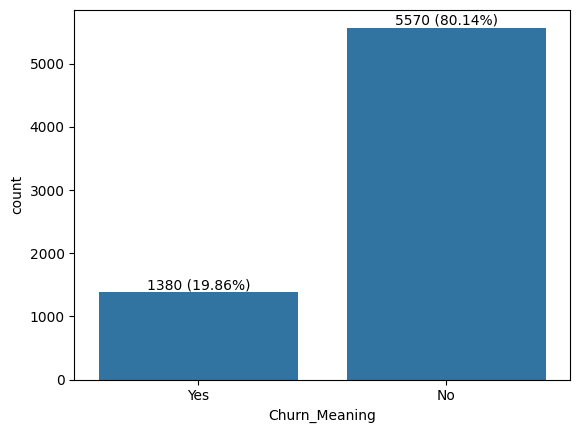

In [104]:
ax = sns.countplot(x=df['Churn_Meaning'],
                   order=df['Churn_Meaning'].value_counts(ascending=True).index);

abs_values = df['Churn_Meaning'].value_counts(ascending=True)
rel_values = df['Churn_Meaning'].value_counts(ascending=True, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.2f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)